### CosMX Protein Annot Cluster Data Analysis

This is an exploration of the CosMX protein data

Goals
* Load the data into the Anndata format. Currently R Data file. Likely need to convert to H5 then to Andata. 

In [ ]:
#First Run Setup

# !pip install scanpy
# !pip install squidpy

In [56]:
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np

# Load files
expr_orig = pd.read_csv(r"C:\Users\evanj\OneDrive\Documents\expression.csv", index_col=0)
expr=expr_orig.transpose()
metadata = pd.read_csv(r"C:\Users\evanj\OneDrive\Documents\metadata.csv", index_col=0)
umap = pd.read_csv(r"C:\Users\evanj\OneDrive\Documents\umap.csv", index_col=0)

# Create AnnData object
adata = sc.AnnData(X=expr.values)

# Assign metadata
adata.obs = metadata
adata.var_names = expr.columns
adata.obs_names = expr.index

# Add spatial coordinates and UMAP to .obsm
adata.obsm["spatial"] = metadata[['x_FOV_px', 'y_FOV_px']].values  # adjust if needed
adata.obsm["X_umap"] = umap.values

In [57]:
# Display General Data on the imported data. Run the import first
display(expr.head(5))
display(metadata.head(5))
display(umap.head(5))

,4-1BB,B7-H3,BCL2,Beta-catenin,CCR7,CD11b,CD11c,CD123,CD127,CD138,...,PDL2,SMA,STING,TCF-1,TIM3,VIM,VISTA,iNOS,p53,panRAS
c_1_10_1,4.052731,4.541703,2.784624,3.419147,2.550799,4.550657,4.343398,3.056747,2.151397,2.674530,...,4.365094,3.822909,3.302002,3.523997,2.929913,6.655085,4.476676,2.784624,3.663159,3.016231
c_1_10_10,3.969106,4.713497,3.521462,4.386992,3.770126,4.317827,3.946294,3.237743,3.164851,3.653503,...,4.105910,4.479142,3.911069,3.823704,4.086043,6.293911,3.810576,3.573042,4.181649,4.115697
c_1_10_100,4.682954,5.489165,3.468132,5.127307,2.546219,3.836335,3.372011,3.199389,3.625306,3.770819,...,3.567740,5.290182,3.506657,3.233073,4.381424,7.325901,3.591165,2.902422,4.343962,4.293639
c_1_10_1000,3.996042,4.684326,3.658237,4.163608,3.081272,3.542153,4.030199,3.184208,3.582363,3.717344,...,3.682301,6.603251,3.794631,3.794631,4.261508,7.309724,3.102724,3.633580,4.156234,3.942513
c_1_10_1001,4.245820,3.890254,5.117325,5.814830,3.241657,3.665941,2.489830,3.566895,4.030626,4.725803,...,4.480117,4.966622,3.494957,4.560359,4.245820,2.901600,3.333406,3.456950,4.346215,4.958024


,cell_ID,RNA_pca_cluster_default,orig.ident,nCount_RNA,nFeature_RNA,nCount_negprobes,nFeature_negprobes,Area,AspectRatio,Width,...,seurat_clusters,major_celltype,merged_annot_cluster,NhCoord10,NhCoord12,NhCoord15,NhCoord20,NhCoord6,NhCoord8,NhCoord20_anno
c_1_10_1,c_1_10_1,1,c,118.47,62,0.89,2,1920,1.64,64,...,3,Stromal_Fibroblast,Fibroblasts/SMCs,0,6,3,0,2,3,Fibroblast_Centric
c_1_10_10,c_1_10_10,1,c,167.51,62,1.45,2,2610,1.00,65,...,2,Epithelial_Tumors,Fibroblasts/SMCs,0,6,3,13,2,3,Fibroblast_Centric
c_1_10_100,c_1_10_100,1,c,238.12,62,1.28,2,3353,0.68,59,...,2,Epithelial_Tumors,Fibroblasts/SMCs,0,0,13,13,2,3,Fibroblast_Centric
c_1_10_1000,c_1_10_1000,1,c,211.68,62,1.91,2,1836,1.15,55,...,3,Stromal_Fibroblast,Fibroblasts/SMCs,0,6,3,0,2,3,Fibroblast_Centric
c_1_10_1001,c_1_10_1001,3,c,81.38,62,0.92,2,1462,1.04,47,...,2,Epithelial_Tumors,Tumor_cells,1,1,5,2,1,1,Tumor_Epi_Centric


,umap_1,umap_2
c_1_10_1,3.916658,1.641677
c_1_10_10,3.243607,1.373015
c_1_10_100,3.120721,-0.178069
c_1_10_1000,3.536797,1.652893
c_1_10_1001,-1.925930,-2.549345


In [58]:
# View Spatial Data
# Access and print spatial data
if 'spatial' in adata.obsm:
    print("Spatial coordinates (first 5 rows):")
    print(adata.obsm['spatial'][:5])
else:
    print("'spatial' key not found in adata.obsm")

Spatial coordinates (first 5 rows):
[[ 149   19]
 [3089   39]
 [1286  519]
 [2956  173]
 [1316  181]]


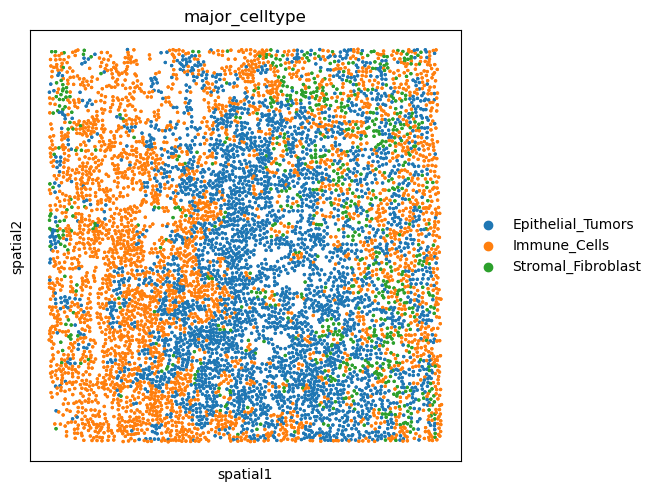

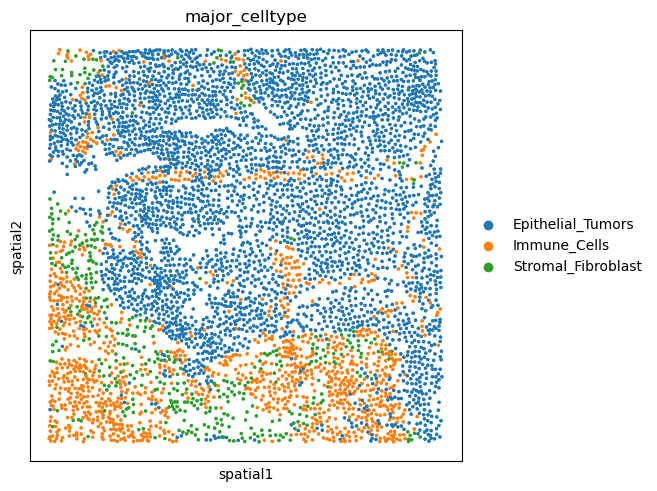

In [59]:
import squidpy as sq
import warnings
warnings.filterwarnings("ignore")
sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("c_1_1_")], shape=None, color="major_celltype", size=8
)

sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("c_1_2_")], shape=None, color="major_celltype", size=8
)

# squidpy.pl.spatial_scatter

Or visualize a single slide with {func}`squidpy.pl.spatial_scatter`. Here the slide identifier
is stored in `adata.obs["Bregma"]`, see original paper for definition.

Visualize 2d plane of spatial cellular data. Does not support true 3d images. Basically XY coordinates.

# sq.pl.spatial_scatter
    adata: AnnData
    color: Optional[str] = None
    basis: str = "spatial"
    img_key: Optional[str] = None
    library_id: Optional[str] = None
    size: Optional[float] = None
    alpha: float = 1.0
    **kwargs






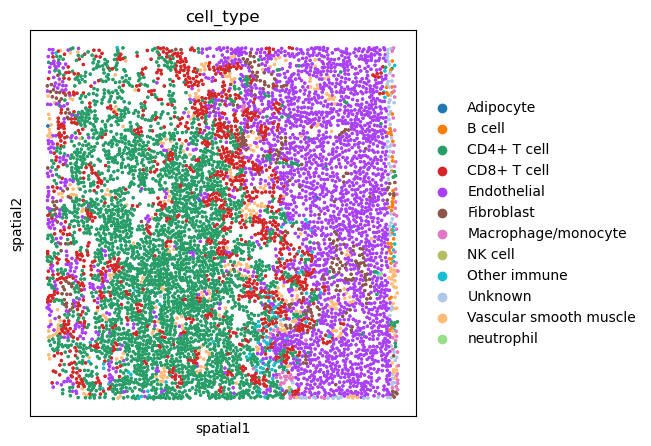

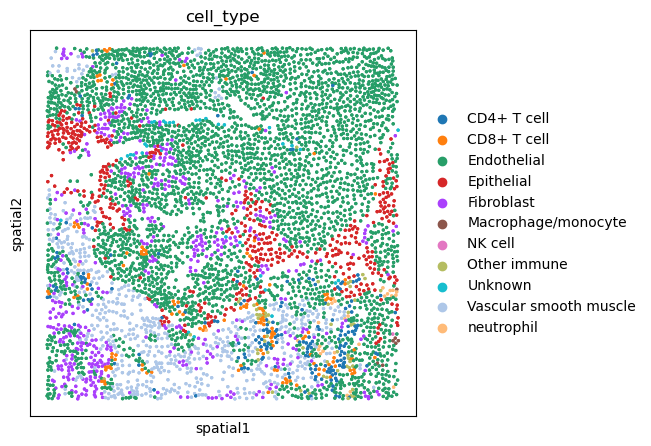

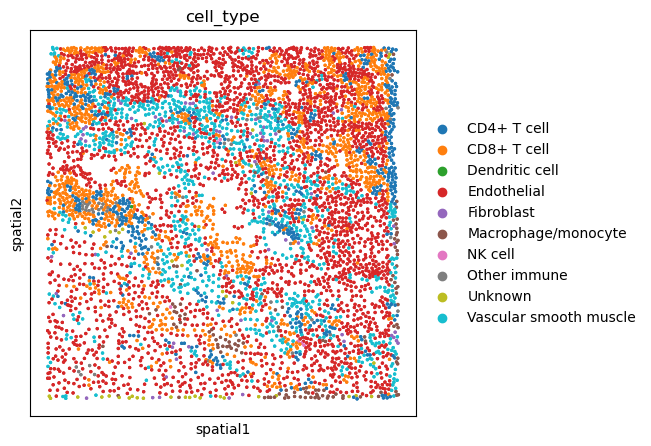

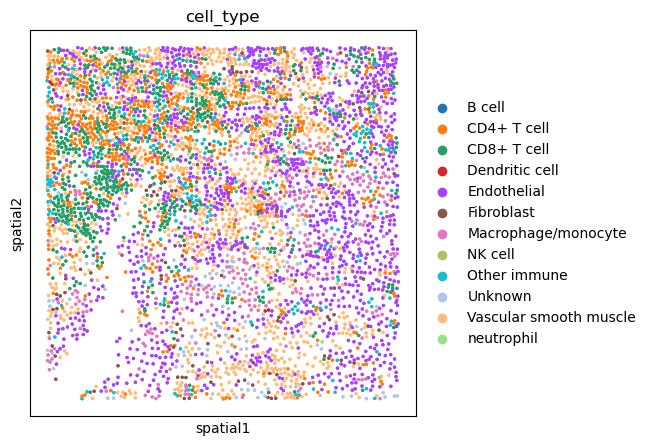

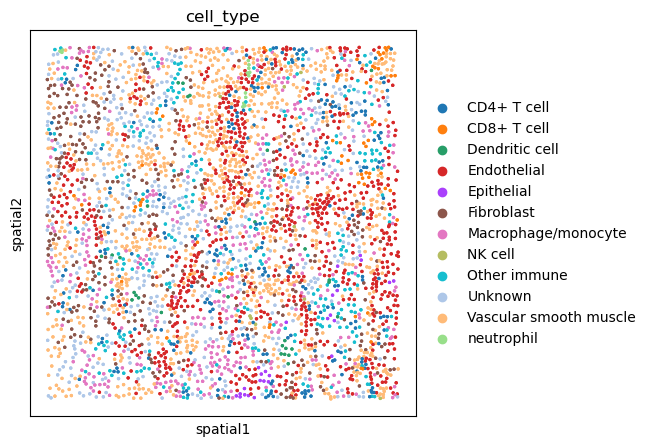

In [51]:
import warnings
warnings.filterwarnings("ignore")

sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("c_1_1_")], shape=None, color="cell_type", size=8
)
sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("c_1_2_")], shape=None, color="cell_type", size=8
)
sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("c_1_3_")], shape=None, color="cell_type", size=8
)
sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("c_1_4_")], shape=None, color="cell_type", size=8
)
sq.pl.spatial_scatter(
    adata[adata.obs.cell_ID.str.contains("c_1_5_")], shape=None, color="cell_type", size=8
)

Neighborhood enrichment analysis in 3D
--------------------------------------
It is important to consider whether the analysis should be performed on the 3D
spatial coordinates or the 2D coordinates for a single slice. Functions that
make use of the spatial graph can already support 3D coordinates, but it is important
to consider that the z-stack coordinate is in the same unit metrics as the x, y coordinates.
Let's start with the neighborhood enrichment score. You can read more on the function
in the docs at {doc}`../examples/graph/compute_spatial_neighbors`.
First, we need to compute a neighbor graph with {func}`squidpy.gr.spatial_neighbors`.
If we want to compute the neighbor graph on the 3D coordinate space,
we need to specify ``spatial_key = "spatial3d"``.
Then we can use {func}`squidpy.gr.nhood_enrichment` to compute the score, and visualize
it with {func}`squidpy.pl.nhood_enrichment`.

### sq.gr.spatial_neighbors

| Parameter     | Description                                                                                             |
| ------------- | ------------------------------------------------------------------------------------------------------- |
| `adata`       | Your `AnnData` object with `.obsm["spatial"]` coordinates.                                              |
| `coord_type`  | `'grid'` for structured data (e.g., Visium), `'generic'` for unstructured spatial data (e.g., seqFISH). |
| `n_neigh`     | Number of nearest neighbors to connect (used with `coord_type="generic"`).                              |
| `radius`      | Distance threshold to define neighbors (alternative to `n_neigh`).                                      |
| `delaunay`    | If `True`, computes a Delaunay triangulation-based graph (for generic data).                            |
| `key_added`   | Custom name for storing the graph in `adata.obsp`. Default is `'spatial_connectivities'`.               |
| `library_id`  | For multi-sample datasets (Visium-style).                                                               |
| `spatial_key` | Which key in `.obsm` to use for spatial coordinates (usually `"spatial"`).                              |

sq.gr.spatial_neighbors(
    adata: AnnData,
    coord_type: str = "grid",
    n_neigh: Optional[int] = None,
    radius: Optional[float] = None,
    key_added: Optional[str] = None,
    delaunay: bool = False,
    library_id: Optional[str] = None,
    spatial_key: str = "spatial"
)

### Outputs
| Location in `adata` | Key                        | Type          | Description                                                                        |
| ------------------- | -------------------------- | ------------- | ---------------------------------------------------------------------------------- |
| `adata.obsp`        | `'spatial_connectivities'` | sparse matrix | Adjacency matrix of the spatial graph (who is connected to whom, weighted)         |
| `adata.obsp`        | `'spatial_distances'`      | sparse matrix | Pairwise Euclidean distances between connected neighbors                           |
| `adata.uns`         | `'spatial_neighbors'`      | dict          | Metadata and indices used to construct the graph (neighbor list, parameters, etc.) |

### sq.gr.nhood_enrichment

It uses the spatial neighbor graph (generated by sq.gr.spatial_neighbors) and a clustering/cell type label (e.g., "Cell_class" or "louvain") to: 
* Count how often each cell type is found near other cell types.
* Compare this to what would be expected by random chance using permutations.
* Compute a Z-score for each pair of cell types indicating:
* Positive Z-score: spatial co-enrichment (they occur near each other more than expected).
* Negative Z-score: spatial exclusion (they avoid each other).
* Near 0: no significant spatial interaction.

| Parameter     | Description                                                    |
| ------------- | -------------------------------------------------------------- |
| `adata`       | The `AnnData` object (must have spatial neighbors precomputed) |
| `cluster_key` | The column in `adata.obs` with cluster/cell-type labels        |
| `n_perms`     | Number of permutations for null distribution (default 1000)    |
| `n_jobs`      | Number of CPU cores to use for parallel processing             |
| `seed`        | Random seed for reproducibility                                |

sq.gr.nhood_enrichment(adata, cluster_key, n_perms=1000, n_jobs=1, seed=None)

### Output 

adata.uns["nhood_enrichment"]



  0%|          | 0/1000 [00:00<?, ?/s]

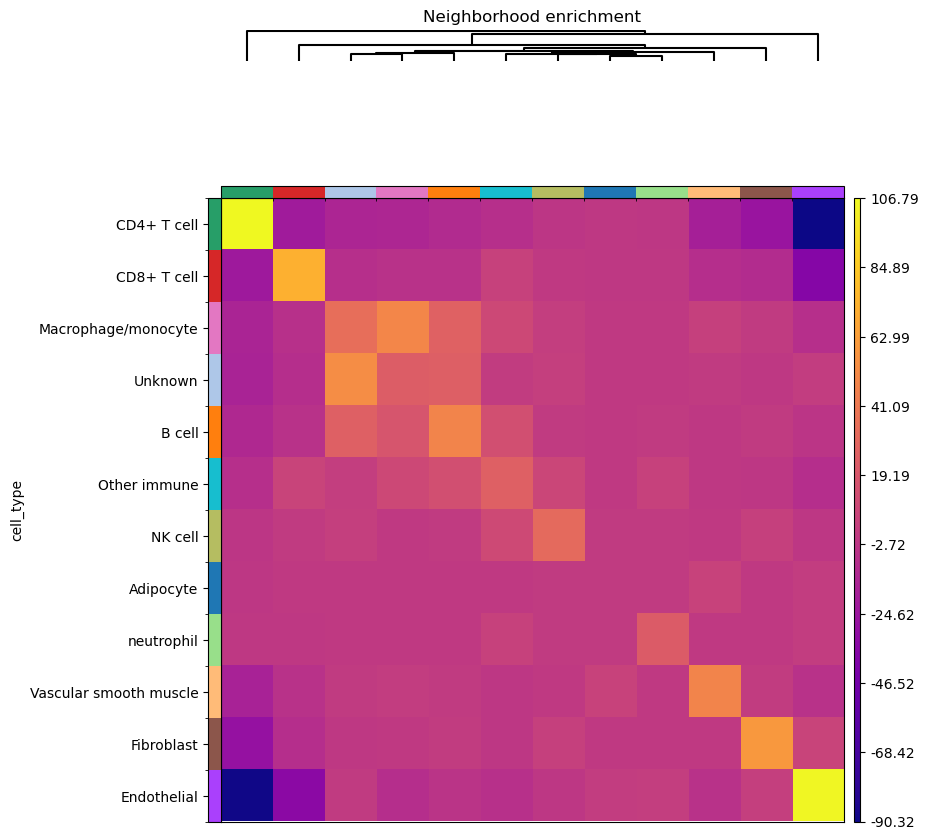

In [61]:
import numpy as np

# Makes subset of the adata object
adata_sub = adata[adata.obs.cell_ID.str.contains("c_1_1_")].copy()

# Ensure 'cell type' is categorical 
adata_sub.obs['cell_type'] = adata_sub.obs['cell_type'].astype('category')

for key in ['spatial_connectivities', 'spatial_distances']:
    if key in adata_sub.obsp:
        del adata_sub.obsp[key]

if 'spatial' in adata_sub.uns:
    del adata_sub.uns['spatial']
finite_mask = np.isfinite(adata_sub.obsm['spatial']).all(axis=1)
adata_sub = adata_sub[finite_mask].copy()

# Compute spatial neighbors on the subset
sq.gr.spatial_neighbors(adata_sub, coord_type="generic", spatial_key="spatial")

# Run neighborhood enrichment on the subset
sq.gr.nhood_enrichment(adata_sub, cluster_key="cell_type")

# Plot neighborhood enrichment results from the subset
sq.pl.nhood_enrichment(
    adata_sub, 
    cluster_key="cell_type", 
    method="single", 
    cmap="plasma", 
)                                                              

In [31]:
import numpy as np

coords = adata_sub.obsm['spatial']
print(np.any(~np.isfinite(coords))) 

False
